#                                                     __BigData Project Model using Pyspark__
<ol>
  <li>Muhammad Sheroz 9852</li>
  <li>Kehkashan Akram 9825</li>
  <li>Hassan Noor Soomro 9827</li>
</ol> 

In [1]:
import pyspark

In [2]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark import SparkConf
from pyspark.sql.functions import desc
from pyspark.sql.functions import *
from pyspark.sql.functions import max as sparkMax

import pyspark.sql.functions as F

In [3]:
#Creating a Spark session
from pyspark.sql import SQLContext
mySpark = SparkSession.builder.getOrCreate()
spark = SparkSession(mySpark)
sqlContext = SQLContext(sparkContext=spark.sparkContext, sparkSession=spark)

e:\Course\BigData\ProJectBigData\ProjectBigenv\lib\site-packages\pyspark\context.py:238: FutureWarning: Python 3.6 support is deprecated in Spark 3.2.
  FutureWarning


In [4]:
#importing the required libraries
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix

import warnings; warnings.filterwarnings(action='once')

In [5]:
#loading the dataset
data = spark.read.csv("./Data/bank_full.csv",inferSchema="true", header="true")

In [6]:
#Display of column name and data type
data.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- Target: string (nullable = true)



In [7]:
data.count()

45211

In [8]:
data.show(10)

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|Target|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------+
| 58|  management| married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown|    no|
| 44|  technician|  single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown|    no|
| 33|entrepreneur| married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown|    no|
| 47| blue-collar| married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown|    no|
| 33|     unknown|  single|  unknown|     no|      1|     no| 

In [9]:
#Removal of rows & columns with NaN/Null values
data.dropna()

DataFrame[age: int, job: string, marital: string, education: string, default: string, balance: int, housing: string, loan: string, contact: string, day: int, month: string, duration: int, campaign: int, pdays: int, previous: int, poutcome: string, Target: string]

In [10]:
data.show(10)

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|Target|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------+
| 58|  management| married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown|    no|
| 44|  technician|  single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown|    no|
| 33|entrepreneur| married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown|    no|
| 47| blue-collar| married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown|    no|
| 33|     unknown|  single|  unknown|     no|      1|     no| 

In [11]:
data.count()

45211

In [12]:
#Removal of duplicate values
data.dropDuplicates()

DataFrame[age: int, job: string, marital: string, education: string, default: string, balance: int, housing: string, loan: string, contact: string, day: int, month: string, duration: int, campaign: int, pdays: int, previous: int, poutcome: string, Target: string]

In [13]:
data.count()

45211

In [14]:
#check the null column count using sql
from pyspark.sql.functions import col,isnan, when, count
data.select([count(when(isnan(a) | col(a).isNull(), a)).alias(a) for a in data.columns]).show()

+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------+
|age|job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|Target|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------+
|  0|  0|      0|        0|      0|      0|      0|   0|      0|  0|    0|       0|       0|    0|       0|       0|     0|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------+



In [15]:
df = data

In [16]:
df = df.replace('yes','1')
df = df.replace('no','0')

In [17]:
df = df.withColumn("default",df.default.cast('integer'))
df = df.withColumn("loan",df.loan.cast('integer'))
df = df.withColumn("housing",df.housing.cast('integer'))
df = df.withColumn("Target",df.Target.cast('integer'))

In [18]:
#Display of column name and data type
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: integer (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: integer (nullable = true)
 |-- loan: integer (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- Target: integer (nullable = true)



In [19]:
data.groupBy("month").count().show()  

+-----+-----+
|month|count|
+-----+-----+
|  jun| 5341|
|  aug| 6247|
|  may|13766|
|  feb| 2649|
|  sep|  579|
|  mar|  477|
|  oct|  738|
|  jul| 6895|
|  nov| 3970|
|  apr| 2932|
|  dec|  214|
|  jan| 1403|
+-----+-----+



In [20]:
data.groupBy("job").count().show()  

+-------------+-----+
|          job|count|
+-------------+-----+
|   management| 9458|
|      retired| 2264|
|      unknown|  288|
|self-employed| 1579|
|      student|  938|
|  blue-collar| 9732|
| entrepreneur| 1487|
|       admin.| 5171|
|   technician| 7597|
|     services| 4154|
|    housemaid| 1240|
|   unemployed| 1303|
+-------------+-----+



In [21]:
data.groupBy("marital").count().show()  

+--------+-----+
| marital|count|
+--------+-----+
|divorced| 5207|
| married|27214|
|  single|12790|
+--------+-----+



In [22]:
data.groupBy("education").count().show()  

+---------+-----+
|education|count|
+---------+-----+
|  unknown| 1857|
| tertiary|13301|
|secondary|23202|
|  primary| 6851|
+---------+-----+



In [23]:
data.groupBy("housing").count().show()  

+-------+-----+
|housing|count|
+-------+-----+
|     no|20081|
|    yes|25130|
+-------+-----+



In [24]:
data.groupBy("loan").count().show()  

+----+-----+
|loan|count|
+----+-----+
|  no|37967|
| yes| 7244|
+----+-----+



In [25]:
data.groupBy("contact").count().show()  

+---------+-----+
|  contact|count|
+---------+-----+
|  unknown|13020|
| cellular|29285|
|telephone| 2906|
+---------+-----+



In [26]:
data.groupBy("campaign").count().show()  

+--------+-----+
|campaign|count|
+--------+-----+
|      31|   12|
|      34|    5|
|      28|   16|
|      26|   13|
|      27|   10|
|      44|    1|
|      12|  155|
|      22|   23|
|       1|17544|
|      13|  133|
|       6| 1291|
|      16|   79|
|       3| 5521|
|      20|   43|
|       5| 1764|
|      19|   44|
|      41|    2|
|      15|   84|
|      43|    3|
|      37|    2|
+--------+-----+
only showing top 20 rows



In [27]:
data.groupBy("poutcome").count().show()  

+--------+-----+
|poutcome|count|
+--------+-----+
| success| 1511|
| unknown|36959|
|   other| 1840|
| failure| 4901|
+--------+-----+



In [28]:
data.groupBy("target").count().show()  

+------+-----+
|target|count|
+------+-----+
|    no|39922|
|   yes| 5289|
+------+-----+



In [29]:
data.filter((F.col('poutcome')=='unknown'))\
    .filter(
        (F.col('target') == 'yes')
    )\
    .show()

+---+-----------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------+
|age|        job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|Target|
+---+-----------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------+
| 59|     admin.| married|secondary|     no|   2343|    yes|  no|unknown|  5|  may|    1042|       1|   -1|       0| unknown|   yes|
| 56|     admin.| married|secondary|     no|     45|     no|  no|unknown|  5|  may|    1467|       1|   -1|       0| unknown|   yes|
| 41| technician| married|secondary|     no|   1270|    yes|  no|unknown|  5|  may|    1389|       1|   -1|       0| unknown|   yes|
| 55|   services| married|secondary|     no|   2476|    yes|  no|unknown|  5|  may|     579|       1|   -1|       0| unknown|   yes|
| 54|     admin.| married| tertiary|     no|    184|     no|  no|unkn

In [30]:
data.filter((F.col('poutcome')=='success'))\
    .filter(
        (F.col('target') == 'yes')
    )\
    .show()

+---+------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------+
|age|         job| marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|Target|
+---+------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------+
| 56|  technician| married|secondary|     no|    589|    yes|  no|  unknown| 23|  oct|     518|       1|  147|       2| success|   yes|
| 53|     retired| married| tertiary|     no|   2269|     no|  no| cellular| 17|  nov|    1091|       2|  150|       1| success|   yes|
| 45|  management|divorced|secondary|     no|    644|    yes|  no| cellular| 19|  nov|     418|       1|  168|       1| success|   yes|
| 46|  unemployed|divorced|secondary|     no|   3354|    yes|  no| cellular| 19|  nov|     522|       1|  174|       1| success|   yes|
| 40|  management| married| tertiary|     no|   

In [31]:
data.filter((F.col('poutcome')=='failure'))\
    .filter(
        (F.col('target') == 'yes')
    )\
    .show()

+---+-------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------+
|age|          job| marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|Target|
+---+-------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------+
| 33|     services| married|secondary|     no|   3444|    yes|  no|telephone| 21|  oct|     144|       1|   91|       4| failure|   yes|
| 36|   management| married| tertiary|     no|      0|    yes|  no|telephone| 23|  oct|     140|       1|  143|       3| failure|   yes|
| 34|       admin.| married| tertiary|     no|    899|    yes|  no|  unknown| 12|  nov|     114|       1|  170|       3| failure|   yes|
| 49|     services| married|secondary|     no|    202|    yes|  no| cellular| 17|  nov|     651|       2|  104|       1| failure|   yes|
| 37|   technician| married|secondary|   

c:\users\sheroz\appdata\local\programs\python\python36\lib\socket.py:657: ResourceWarning: unclosed <socket.socket fd=3668, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 63565), raddr=('127.0.0.1', 63564)>
  self._sock = None


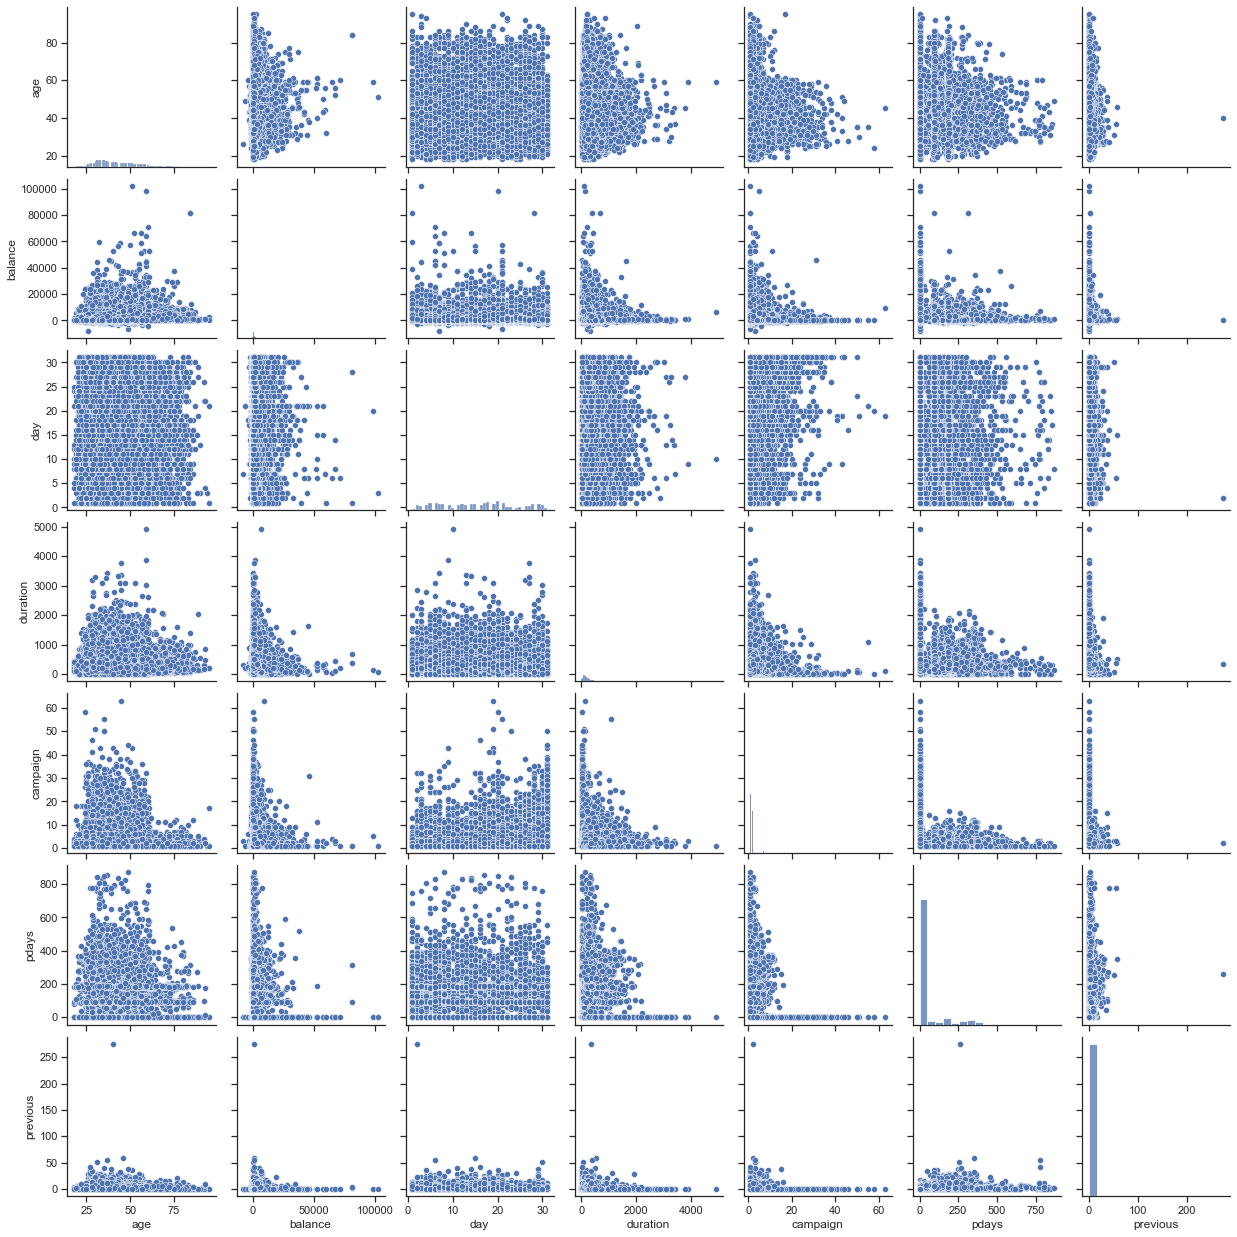

In [32]:
sns.set(style="ticks")

sns.pairplot(data.toPandas())
plt.show()

In [33]:
df.show()

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|Target|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------+
| 58|  management| married| tertiary|      0|   2143|      1|   0|unknown|  5|  may|     261|       1|   -1|       0| unknown|     0|
| 44|  technician|  single|secondary|      0|     29|      1|   0|unknown|  5|  may|     151|       1|   -1|       0| unknown|     0|
| 33|entrepreneur| married|secondary|      0|      2|      1|   1|unknown|  5|  may|      76|       1|   -1|       0| unknown|     0|
| 47| blue-collar| married|  unknown|      0|   1506|      1|   0|unknown|  5|  may|      92|       1|   -1|       0| unknown|     0|
| 33|     unknown|  single|  unknown|      0|      1|      0| 

c:\users\sheroz\appdata\local\programs\python\python36\lib\socket.py:657: ResourceWarning: unclosed <socket.socket fd=2312, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 63571), raddr=('127.0.0.1', 63570)>
  self._sock = None


[Text(0.5, 0, 'job'), Text(0, 0.5, 'Target')]

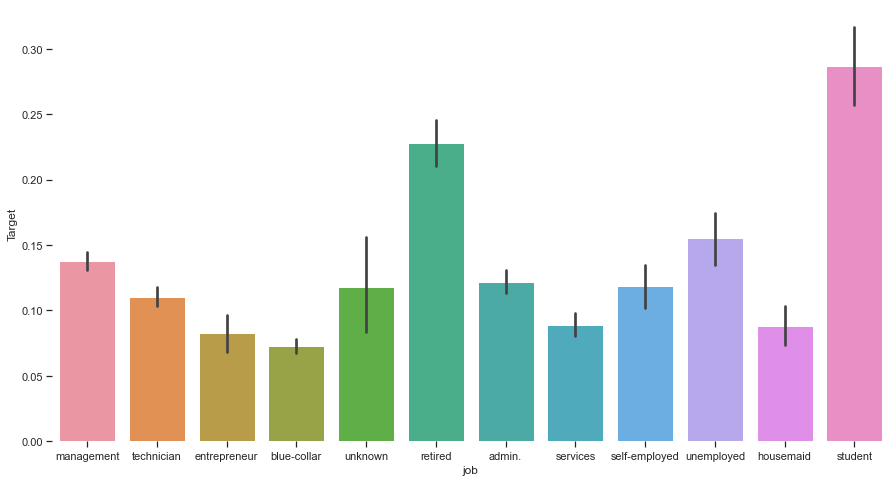

In [34]:
f, ax = plt.subplots(figsize = (15,8)) 
sns.barplot(x="job", y = "Target", data = df.toPandas())
sns.despine(left = True, bottom = True)
ax.set(xlabel='job', ylabel='Target')

c:\users\sheroz\appdata\local\programs\python\python36\lib\socket.py:657: ResourceWarning: unclosed <socket.socket fd=1812, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 63574), raddr=('127.0.0.1', 63573)>
  self._sock = None


[Text(0.5, 0, 'marital'), Text(0, 0.5, 'Target')]

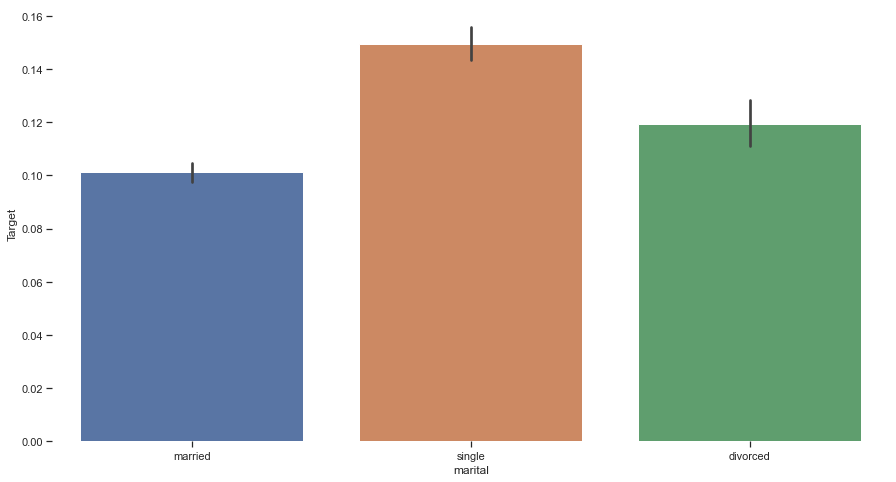

In [35]:
f, ax = plt.subplots(figsize = (15,8)) 
sns.barplot(x="marital", y = "Target", data = df.toPandas())
sns.despine(left = True, bottom = True)
ax.set(xlabel='marital', ylabel='Target')

c:\users\sheroz\appdata\local\programs\python\python36\lib\socket.py:657: ResourceWarning: unclosed <socket.socket fd=3636, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 63578), raddr=('127.0.0.1', 63577)>
  self._sock = None


[Text(0.5, 0, 'education'), Text(0, 0.5, 'Target')]

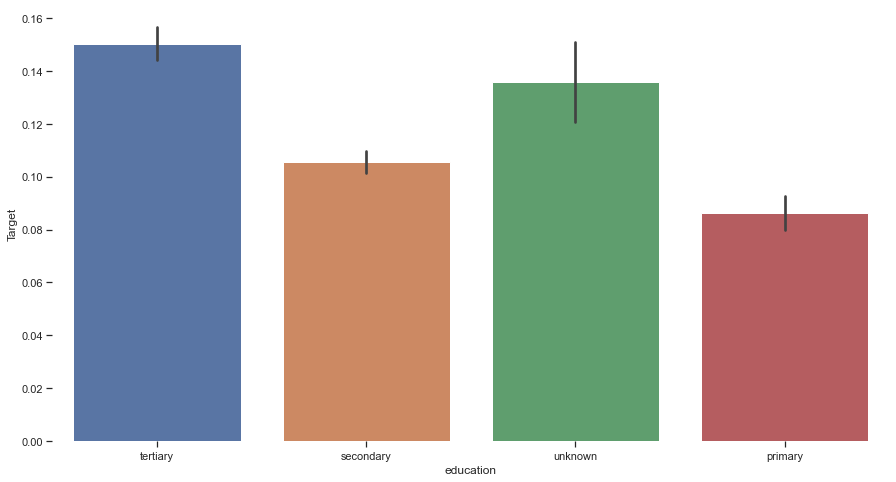

In [36]:
f, ax = plt.subplots(figsize = (15,8)) 
sns.barplot(x="education", y = "Target", data = df.toPandas())
sns.despine(left = True, bottom = True)
ax.set(xlabel='education', ylabel='Target')

c:\users\sheroz\appdata\local\programs\python\python36\lib\socket.py:657: ResourceWarning: unclosed <socket.socket fd=3588, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 63581), raddr=('127.0.0.1', 63580)>
  self._sock = None


[Text(0.5, 0, 'housing'), Text(0, 0.5, 'Target')]

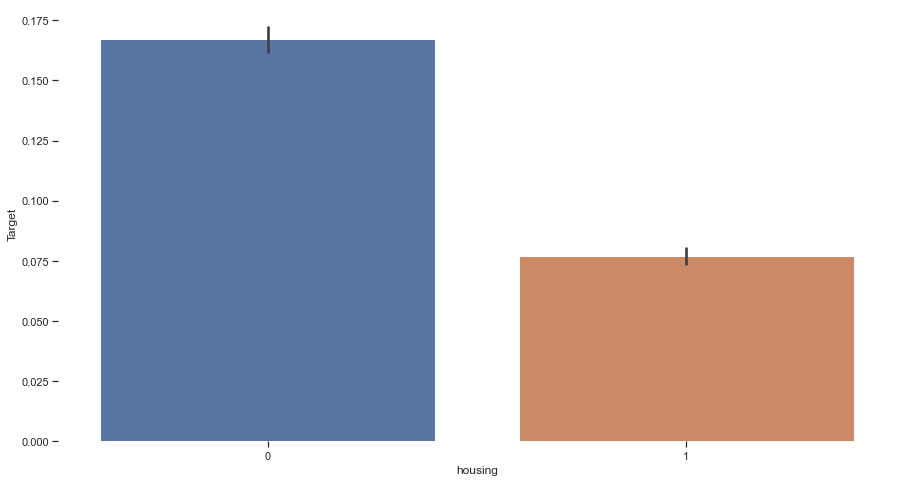

In [37]:
f, ax = plt.subplots(figsize = (15,8)) 
sns.barplot(x="housing", y = "Target", data = df.toPandas())
sns.despine(left = True, bottom = True)
ax.set(xlabel='housing', ylabel='Target')

c:\users\sheroz\appdata\local\programs\python\python36\lib\socket.py:657: ResourceWarning: unclosed <socket.socket fd=3904, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 63583), raddr=('127.0.0.1', 63582)>
  self._sock = None


<AxesSubplot:>

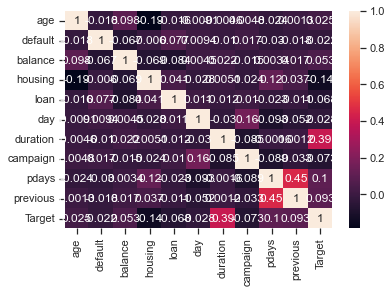

In [38]:
sns.heatmap(df.toPandas().corr(), annot = True)

In [39]:
df.show()

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|Target|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------+
| 58|  management| married| tertiary|      0|   2143|      1|   0|unknown|  5|  may|     261|       1|   -1|       0| unknown|     0|
| 44|  technician|  single|secondary|      0|     29|      1|   0|unknown|  5|  may|     151|       1|   -1|       0| unknown|     0|
| 33|entrepreneur| married|secondary|      0|      2|      1|   1|unknown|  5|  may|      76|       1|   -1|       0| unknown|     0|
| 47| blue-collar| married|  unknown|      0|   1506|      1|   0|unknown|  5|  may|      92|       1|   -1|       0| unknown|     0|
| 33|     unknown|  single|  unknown|      0|      1|      0| 

In [40]:
cols = df.columns

In [41]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
categoricalColumns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'Target', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="Subscribed")
stages += [assembler]

In [42]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'Subscribed'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- Subscribed: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: integer (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: integer (nullable = true)
 |-- loan: integer (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- Target: integer (nullable = true)



In [43]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

c:\users\sheroz\appdata\local\programs\python\python36\lib\socket.py:657: ResourceWarning: unclosed <socket.socket fd=3944, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 63587), raddr=('127.0.0.1', 63586)>
  self._sock = None


,0,1,2,3,4
label,0,0,0,0,0
Subscribed,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,0,0,0,0,0
balance,2143,29,2,1506,1
housing,1,1,1,1,0
loan,0,0,1,0,0


In [44]:
train, test = df.randomSplit([0.8, 0.2], seed = 2022)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 36061
Test Dataset Count: 9150


<center><h1>LogisticRegression</h1></center>

In [45]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'Subscribed', labelCol = 'label', maxIter=15)
lrModel = lr.fit(train)

In [46]:
predictions_LogisticRegression = lrModel.transform(test)
predictions_LogisticRegression.show()

+-----+--------------------+---+-----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------+--------------------+--------------------+----------+
|label|          Subscribed|age|        job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|Target|       rawPrediction|         probability|prediction|
+-----+--------------------+---+-----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------+--------------------+--------------------+----------+
|  0.0|(42,[0,11,13,16,1...| 48|blue-collar|married|secondary|      1|      0|      1|   1|cellular|  7|  may|     275|       1|   -1|       0| unknown|     0|[3.16032930155439...|[0.95931380128637...|       0.0|
|  0.0|(42,[0,11,13,16,1...| 30|blue-collar|married|secondary|      0|   -109|      1|   1|cellular|  7|  may|     160|       4|   -1|       0| unkn

In [47]:
predictions_LogisticRegression.select('label','prediction').show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 20 rows



In [48]:
predictions_LogisticRegression.groupBy('label', 'prediction').count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|  383|
|  0.0|       1.0|  190|
|  1.0|       0.0|  709|
|  0.0|       0.0| 7868|
+-----+----------+-----+



In [49]:
# calculate the elements of the confusion matrix
TN = predictions_LogisticRegression.filter('prediction = 0 AND label = prediction').count()
TP = predictions_LogisticRegression.filter('prediction = 1 AND label = prediction').count()
FN = predictions_LogisticRegression.filter('prediction = 0 AND label <> prediction').count()
FP = predictions_LogisticRegression.filter('prediction = 1 AND label <> prediction').count()

In [50]:
accuracy_LogisticRegression = (TN + TP) / (TN + TP + FN +FP)
precision_LogisticRegression = TP / (TP + FP)
recall_LogisticRegression = TP/ (TP + FN)

print('n accuracy: %0.3f' % accuracy_LogisticRegression)
print('n precision: %0.3f' % precision_LogisticRegression)
print('n recall: %0.3f' % recall_LogisticRegression)

n accuracy: 0.902
n precision: 0.668
n recall: 0.351


In [51]:
y_true = predictions_LogisticRegression.select('label').collect()
y_pred = predictions_LogisticRegression.select('prediction').collect()

c:\users\sheroz\appdata\local\programs\python\python36\lib\socket.py:657: ResourceWarning: unclosed <socket.socket fd=3956, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 63594), raddr=('127.0.0.1', 63593)>
  self._sock = None
c:\users\sheroz\appdata\local\programs\python\python36\lib\socket.py:657: ResourceWarning: unclosed <socket.socket fd=3972, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 63597), raddr=('127.0.0.1', 63596)>
  self._sock = None


In [52]:
!pip install scikit-learn

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2b60375f388>
e:\Course\BigData\ProJectBigData\ProjectBigenv\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=6>
  return process_handler(cmd, _system_body)
e:\Course\BigData\ProJectBigData\ProjectBigenv\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
e:\Course\BigData\ProJectBigData\ProjectBigenv\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)


In [53]:
from sklearn import metrics

In [54]:
cm = metrics.confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7868  190]
 [ 709  383]]


In [55]:
import matplotlib.pyplot as plt

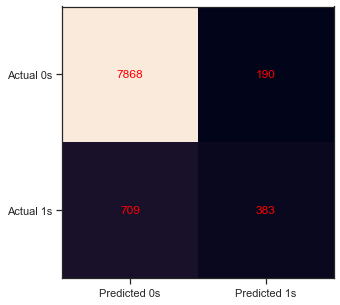

In [56]:
fig , ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], ha='center', va='center', color='red')
plt.show()

In [57]:
predictions_LogisticRegression = lrModel.transform(test)
predictions_LogisticRegression.filter((F.col('prediction') == 1.0))\
    .show()

+-----+--------------------+---+-----------+-------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------+--------------------+--------------------+----------+
|label|          Subscribed|age|        job|marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|Target|       rawPrediction|         probability|prediction|
+-----+--------------------+---+-----------+-------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------+--------------------+--------------------+----------+
|  0.0|(42,[0,11,13,16,1...| 36|blue-collar|married|secondary|      0|    195|      1|   1| cellular|  7|  may|    1297|       2|   -1|       0| unknown|     0|[-0.9348452366197...|[0.28194275576626...|       1.0|
|  0.0|(42,[0,11,13,16,1...| 27|blue-collar|married|secondary|      0|   1295|      1|   0| cellular| 14|  may|    1106|       1|   -1|       0|

In [58]:
predictions_LogisticRegression.filter((F.col('prediction') == 1.0))\
    .count()

573

<center><h1>DecisionTree</h1></center>

In [59]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'Subscribed', labelCol = 'label', maxDepth= 3)
dtModel = dt.fit(train)
predictions_DecisionTree = dtModel.transform(test)
predictions_DecisionTree.filter((F.col('prediction') == 1.0))\
    .show()

+-----+--------------------+---+-----------+-------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------+-------------+--------------------+----------+
|label|          Subscribed|age|        job|marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|Target|rawPrediction|         probability|prediction|
+-----+--------------------+---+-----------+-------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------+-------------+--------------------+----------+
|  0.0|(42,[0,11,13,16,1...| 36|blue-collar|married|secondary|      0|    195|      1|   1| cellular|  7|  may|    1297|       2|   -1|       0| unknown|     0|[460.0,667.0]|[0.40816326530612...|       1.0|
|  0.0|(42,[0,11,13,16,1...| 27|blue-collar|married|secondary|      0|   1295|      1|   0| cellular| 14|  may|    1106|       1|   -1|       0| unknown|     0|[460.0,667.0

In [60]:
predictions_DecisionTree.select('label','prediction').show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 20 rows



In [78]:
predictions_DecisionTree.groupBy('label', 'prediction').count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|  165|
|  0.0|       1.0|  114|
|  1.0|       0.0|  927|
|  0.0|       0.0| 7944|
+-----+----------+-----+



In [61]:
# calculate the elements of the confusion matrix
TN = predictions_DecisionTree.filter('prediction = 0 AND label = prediction').count()
TP = predictions_DecisionTree.filter('prediction = 1 AND label = prediction').count()
FN = predictions_DecisionTree.filter('prediction = 0 AND label <> prediction').count()
FP = predictions_DecisionTree.filter('prediction = 1 AND label <> prediction').count()

In [62]:
accuracy_DecisionTree = (TN + TP) / (TN + TP + FN +FP)
precision_DecisionTree = TP / (TP + FP)
recall_DecisionTree = TP/ (TP + FN)

print('n accuracy: %0.3f' % accuracy_DecisionTree)
print('n precision: %0.3f' % precision_DecisionTree)
print('n recall: %0.3f' % recall_DecisionTree)

n accuracy: 0.886
n precision: 0.591
n recall: 0.151


In [63]:
y_true = predictions_DecisionTree.select('label').collect()
y_pred = predictions_DecisionTree.select('prediction').collect()

c:\users\sheroz\appdata\local\programs\python\python36\lib\socket.py:657: ResourceWarning: unclosed <socket.socket fd=4068, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 63607), raddr=('127.0.0.1', 63606)>
  self._sock = None
c:\users\sheroz\appdata\local\programs\python\python36\lib\socket.py:657: ResourceWarning: unclosed <socket.socket fd=3948, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 63609), raddr=('127.0.0.1', 63608)>
  self._sock = None


In [64]:
from sklearn import metrics

In [65]:
cm = metrics.confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7944  114]
 [ 927  165]]


In [66]:
import matplotlib.pyplot as plt

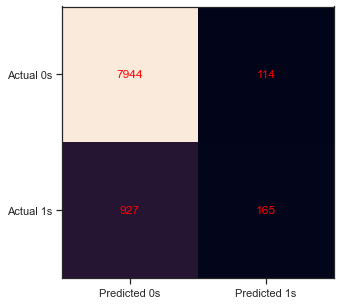

In [67]:
fig , ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], ha='center', va='center', color='red')
plt.show()

<center><h1>GBT</h1></center>

In [68]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(featuresCol = 'Subscribed', labelCol = 'label', maxIter=10)
gbtModel = gbt.fit(train)
predictions_GBT = gbtModel.transform(test)
predictions_GBT.filter((F.col('prediction') == 1.0))\
    .show()

+-----+--------------------+---+-----------+-------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------+--------------------+--------------------+----------+
|label|          Subscribed|age|        job|marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|Target|       rawPrediction|         probability|prediction|
+-----+--------------------+---+-----------+-------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------+--------------------+--------------------+----------+
|  0.0|(42,[0,11,13,16,1...| 36|blue-collar|married|secondary|      0|    195|      1|   1| cellular|  7|  may|    1297|       2|   -1|       0| unknown|     0|[-0.2186119786464...|[0.39240264308950...|       1.0|
|  0.0|(42,[0,11,13,16,1...| 27|blue-collar|married|secondary|      0|   1295|      1|   0| cellular| 14|  may|    1106|       1|   -1|       0|

In [69]:
predictions_GBT.select('label','prediction').show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 20 rows



In [70]:
predictions_GBT.groupBy('label', 'prediction').count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|  423|
|  0.0|       1.0|  224|
|  1.0|       0.0|  669|
|  0.0|       0.0| 7834|
+-----+----------+-----+



In [71]:
# calculate the elements of the confusion matrix
TN = predictions_GBT.filter('prediction = 0 AND label = prediction').count()
TP = predictions_GBT.filter('prediction = 1 AND label = prediction').count()
FN = predictions_GBT.filter('prediction = 0 AND label <> prediction').count()
FP = predictions_GBT.filter('prediction = 1 AND label <> prediction').count()

In [72]:
accuracy_GBT = (TN + TP) / (TN + TP + FN +FP)
precision_GBT = TP / (TP + FP)
recall_GBT = TP/ (TP + FN)

print('n accuracy: %0.3f' % accuracy_GBT)
print('n precision: %0.3f' % precision_GBT)
print('n recall: %0.3f' % recall_GBT)

n accuracy: 0.902
n precision: 0.654
n recall: 0.387


In [73]:
y_true = predictions_GBT.select('label').collect()
y_pred = predictions_GBT.select('prediction').collect()

c:\users\sheroz\appdata\local\programs\python\python36\lib\socket.py:657: ResourceWarning: unclosed <socket.socket fd=3972, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 63616), raddr=('127.0.0.1', 63615)>
  self._sock = None
c:\users\sheroz\appdata\local\programs\python\python36\lib\socket.py:657: ResourceWarning: unclosed <socket.socket fd=3636, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 63618), raddr=('127.0.0.1', 63617)>
  self._sock = None


In [74]:
from sklearn import metrics

In [75]:
cm = metrics.confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7834  224]
 [ 669  423]]


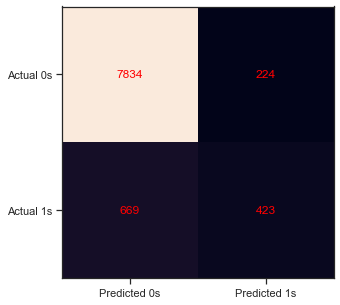

In [76]:
fig , ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], ha='center', va='center', color='red')
plt.show()

<center><h1>Comparision</h1></center>

In [77]:
print("LogisticRegression")
print('n accuracy: %0.3f' % accuracy_LogisticRegression)
print('n precision: %0.3f' % precision_LogisticRegression)
print('n recall: %0.3f' % recall_LogisticRegression)
print('------------------------------------')
print("DecisionTree")
print('n accuracy: %0.3f' % accuracy_DecisionTree)
print('n precision: %0.3f' % precision_DecisionTree)
print('n recall: %0.3f' % recall_DecisionTree)
print('------------------------------------')
print("GBT")
print('n accuracy: %0.3f' % accuracy_GBT)
print('n precision: %0.3f' % precision_GBT)
print('n recall: %0.3f' % recall_GBT)

LogisticRegression
n accuracy: 0.902
n precision: 0.668
n recall: 0.351
------------------------------------
DecisionTree
n accuracy: 0.886
n precision: 0.591
n recall: 0.151
------------------------------------
GBT
n accuracy: 0.902
n precision: 0.654
n recall: 0.387
